<a href="https://colab.research.google.com/github/fecampos/examples/blob/main/data_analysis_for_CARS2009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
! pip -q install xarray
import xarray as xr
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


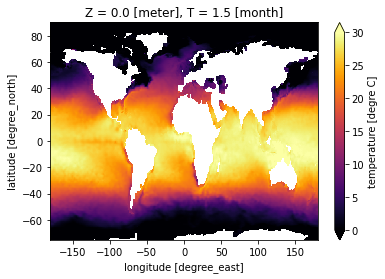

In [35]:
file = "./CARS2009/temp_month.cdf"
ds = xr.open_mfdataset(file, parallel = True).isel(Z=0, T=1)
ds.temperature.plot(vmin=0, vmax=30, cmap="inferno")